In [1]:
import biota.dynamicFluxes as dyn
import math

In [2]:
workingVolume = 20000
tankDiameter = 2.34
impellerDiameter = tankDiameter/3
rpm = 42.3
backPressure = 1.3
superficialVel = 0.004
moleFracO2 = 0.21
initVol = 0.76 * workingVolume
initCells = 0.6e6
temp = 310
powerNumber = 5
mediumDensity = 1000
mediumViscosity = 9e-4
vesselVolDay = 0.0
perfLactateRate = 5.0
perfAmmrate = 5.0
initialBubbleDiameter = 0.002

STR_test = dyn.Bioreactor(wv=workingVolume,t=tankDiameter,d=impellerDiameter,n=rpm,p_back=backPressure,u_s=superficialVel,mf_O2_gas=moleFracO2,v0=initVol,ns=initCells,Temp=temp,
                                     Np=powerNumber,rho=mediumDensity,mu=mediumViscosity,vvd=vesselVolDay,perfAMM=perfAmmrate,perfLAC=perfLactateRate,initialBubbleDiam=initialBubbleDiameter)

In [3]:
growthRate = 0.029

glutamineUptakeRate = 0
glucoseUptakeRate = 0
oxygenUptakeRate = 0.45
uptakeList = [glutamineUptakeRate, glucoseUptakeRate, oxygenUptakeRate]

carbonDioxideProdRate = 0.57
ammoniaProductionRate = 0.092
lactateProductionRate = 0.624
prodList = [carbonDioxideProdRate, ammoniaProductionRate, lactateProductionRate]

massDensity = 1030
cellRadius = 18e-6
wetmass = 3000
dryMassFraction = 0.3

ammoniaLimit = 5
lactateLimit = 50
CO2Limit = 100
turbLengthLimit = 20e-6
limitsList = [ammoniaLimit, lactateLimit, CO2Limit, turbLengthLimit]

gemsModel = 'GEMS/iCHO_K1par-8mMAP.xml'

cell_Test = dyn.Cell(mu=growthRate,uptakes=uptakeList,prod=prodList,rho=massDensity,rad=cellRadius,wetmass=wetmass,dmf=dryMassFraction,limits=limitsList,gemsModel=gemsModel)

In [4]:
def kLaModel(rpm, gasv, power, vol, density, visc, totalA):
    eps = power/vol/density
    kinvisc = visc/density
    massDiff = 3.4e-9
    kl = 0.3*(massDiff/kinvisc)**0.5*(eps*kinvisc)**0.25
    return kl*totalA/vol

def ghuModel(rpm,gasv,vol):
    ghu=0.05 #func of rpm usually
    bubbleDiam = 0.005
    nBubbles = ghu*vol
    bubbleArea = 4*math.pi*(bubbleDiam/2)**2
    return nBubbles * bubbleArea

In [5]:
data = dyn.unsteadyPerf(STR_test,cell_Test,10,0.5,1,kLaFunc=kLaModel,ghuFunc=ghuModel)

Feasibility:   -1000000.0
1800.0
1800
Feasibility:   -1000000.0
3600.0
0
Feasibility:   -1000000.0
5400.0
1800
Feasibility:   -1000000.0
7200.0
0
Feasibility:   -1000000.0
9000.0
1800
Feasibility:   -1000000.0
10800.0
0
Feasibility:   -1000000.0
12600.0
1800
Feasibility:   -1000000.0
14400.0
0
Feasibility:   -1000000.0
16200.0
1800
Feasibility:   -1000000.0
18000.0
0
Feasibility:   -1000000.0
19800.0
1800
Feasibility:   -1000000.0
21600.0
0
Feasibility:   -1000000.0
23400.0
1800
Feasibility:   -1000000.0
25200.0
0
Feasibility:   -1000000.0
27000.0
1800
Feasibility:   -1000000.0
28800.0
0
Feasibility:   -1000000.0
30600.0
1800
Feasibility:   -1000000.0
32400.0
0
Feasibility:   -1000000.0
34200.0
1800
Feasibility:   -1000000.0
36000.0
0


In [6]:
data

,Time [hr],Ncells,C_O2,C_amm
0,0.0,9.120000e+12,0.299200,0.000000
0,1.0,9.510768e+12,0.259649,0.094705
0,2.0,9.918280e+12,0.218403,0.193467
0,3.0,1.034325e+13,0.175390,0.296461
0,4.0,1.078643e+13,0.130534,0.403868
0,5.0,1.124861e+13,0.083756,0.515878
0,6.0,1.173058e+13,0.034973,0.632686
0,7.0,1.223320e+13,-0.015899,0.754500
0,8.0,1.275737e+13,-0.068952,0.881533
0,9.0,1.330399e+13,-0.124277,1.014009


<AxesSubplot:xlabel='Time [hr]'>

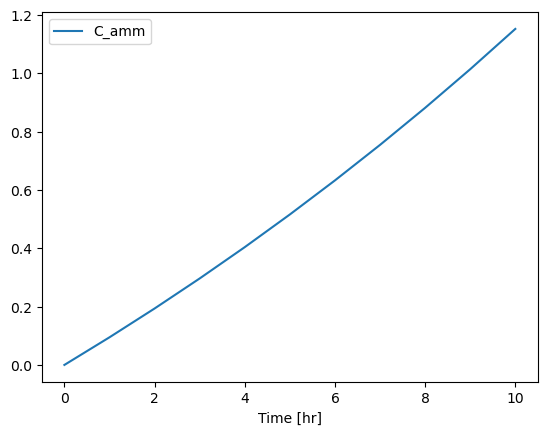

In [7]:
data.plot(x='Time [hr]', y='C_amm')

In [8]:
0.01*3600

36.0